# FINM 250 Homework 4
### TA Solutions

## Part 2

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys

sys.path.append("commands")
from utils import (
    calc_performance_metrics,
    calc_univariate_regression,
    calc_multivariate_regression,
)


plt.rcParams["axes.grid"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

plt.style.use("bmh")

gmwax = pd.read_excel(
    "data/gmo_analysis_data.xlsx",
    sheet_name="total returns",
    index_col=0,
    parse_dates=[0],
)

# Very important note, .loc is INCLUSIVE on datetime
gmwax_pre_2011 = gmwax.loc[:"2011"]
gmwax_post_2012 = gmwax.loc["2012":]

### 1, 2

In [16]:
perf_metrics = calc_performance_metrics(gmwax)
perf_metrics_pre_2011 = calc_performance_metrics(gmwax_pre_2011)
perf_metrics_post_2012 = calc_performance_metrics(gmwax_post_2012)

print("Inception to 2011")
display(perf_metrics_pre_2011)
print("Post 2012")
display(perf_metrics_post_2012)
print("Full Sample")
display(perf_metrics)

Inception to 2011


,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days),Calmar Ratio
SPY,0.064162,0.164329,0.390448,0.552025,-0.535812,0.602758,-0.079482,-0.103512,-0.165187,0.109147,-0.507976,2009-02-27,2007-10-31,-,-,0.126309
GMWAX,0.074759,0.110348,0.677488,0.844753,-0.883875,3.016184,-0.043986,-0.072452,-0.145129,0.085656,-0.293614,2009-02-27,2011-04-29,2010-10-29 00:00:00,609,0.254618
GMGEX,0.024514,0.147081,0.166673,0.230591,-0.550026,0.711675,-0.079652,-0.096952,-0.151229,0.096169,-0.555630,2009-02-27,2007-10-31,-,-,0.044120


Post 2012


,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days),Calmar Ratio
SPY,0.146742,0.141307,1.038465,1.507201,-0.471184,0.777593,-0.060905,-0.083136,-0.124643,0.126983,-0.239280,2022-09-30,2025-06-30,2023-12-29 00:00:00,455,0.613266
GMWAX,0.061107,0.093605,0.652821,0.943909,-0.498119,2.128437,-0.036933,-0.055550,-0.114967,0.078058,-0.216795,2022-09-30,2025-06-30,2024-02-29 00:00:00,517,0.281866
GMGEX,0.023007,0.230944,0.099621,0.082883,-6.125376,59.689934,-0.066179,-0.151143,-0.658652,0.124727,-0.737364,2016-11-30,2014-06-30,-,-,0.031201


Full Sample


,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days),Calmar Ratio
SPY,0.103165,0.154125,0.669357,0.947799,-0.544214,0.749984,-0.074563,-0.096833,-0.165187,0.126983,-0.507976,2009-02-27,2025-06-30,2012-03-30 00:00:00,1127,0.203090
GMWAX,0.068311,0.102652,0.665467,0.874064,-0.742122,2.799740,-0.040435,-0.065974,-0.145129,0.085656,-0.293614,2009-02-27,2025-06-30,2010-10-29 00:00:00,609,0.232657
GMGEX,0.023802,0.191033,0.124598,0.116226,-5.194295,59.543001,-0.075489,-0.126337,-0.658652,0.124727,-0.761812,2016-11-30,2007-10-31,-,-,0.031244


### 1 Discussion

No, not really. They have been mostly constant. The only difference has been that from 2012 onwards GMWAX has had a slightly lower mean return and lower volatility (7.5% to 6.1%, and 11% to 9.3%). It's also had a slightly lower Sharpe ratio (0.68 vs. 0.65).

### 2a, 2b

I would say it has lower tail risk when compared to the market. Specifically, the min return of the market is -16.5% and -12.5% in the two subsamples, compared to GMWAX's -14.5% and -11.5%. This difference is relatively minor.

However, looking at VaR(0.05), GMWAX has roughly half the VaR as SPY in both samples, indicating lower tail risk. Finally, in the first stable max drawdown is substantially lower (-50% for SPY(!) compared to -30% for GMWAX), but they are broadly similar in the second period.

So, I would say that GMWAX has lower tail risk, particularly in the first period that includes the GFC. In the second period, the differences are more minor, but the VaR still favors GMWAX.

### 3a

In [17]:
regr_full = calc_univariate_regression(y=gmwax["GMWAX"], X=gmwax[["SPY"]])
regr_pre_2011 = calc_univariate_regression(
    y=gmwax_pre_2011["GMWAX"], X=gmwax_pre_2011[["SPY"]]
)
regr_post_2012 = calc_univariate_regression(
    y=gmwax_post_2012["GMWAX"], X=gmwax_post_2012[["SPY"]]
)

out = pd.concat([regr_full, regr_pre_2011, regr_post_2012])
out.index = ["Pre-2011", "Post-2012", "Full Sample"]
out

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
Pre-2011,0.011822,0.547565,0.575842,0.675907,0.124755,0.202295,0.004870
Post-2012,0.040020,0.541425,0.600182,0.650092,0.138079,0.613115,0.005440
Full Sample,-0.022187,0.567623,0.536775,0.734259,0.107655,-0.459802,0.004021


### 3b

I would not call this a low beta strategy; the beta is ~0.54, and the $r^2$ is 65-67%. That means that *most* of the variance of GMWAX can be explained by SPY. This hasn't changed since the case, the only distinction is that alpha has gone up from 1% annualized to 4% annualized.

### 3c

I think it's dependent on how you cut the data. Specifically, in each of the subsamples, GMWAX *does* appear to provide alpha. However, looking at the full sample, it doesn't! So, I would say GMWAX appears to have provided alpha since 2012, but not across the full sample.

## Part 3

In [22]:
signals = pd.read_excel(
    "data/gmo_analysis_data.xlsx", sheet_name="signals", index_col=0, parse_dates=[0]
)

# NOTE: there are 2 ways to do this that will give slightly difference results.
# First, you could shift the Xs (signals) forward by 1. Second, you could shift SPY
# backwards by 1. I'm doing the former.

## always shift the signals forward by 1 for the best results because it keeps the last data point
forecast = signals.shift(1)

# For the last row, fill with the original value (or you can use another logic)
shifted.iloc[-1] = signals.iloc[-1]

forecast = shifted
forecast["SPY"] = gmwax["SPY"]
forecast = forecast.dropna(how="any", axis=0)

out_regr = pd.concat(
    [
        calc_univariate_regression(y=forecast["SPY"], X=forecast[["SPX D/P"]]),
        calc_univariate_regression(y=forecast["SPY"], X=forecast[["SPX E/P"]]),
    ]
)
out_regr.index = ["SPX D/P", "SPX E/P"]
display(out_regr)
calc_multivariate_regression(y=forecast["SPY"], X=forecast[["SPX D/P", "SPX E/P", "T-Note 10YR"]])

NameError: name 'shifted' is not defined

Honestly? It does fairly well for a predictive regression. the r^2s are not basically 0 (by finance standards).

### 2

In [ ]:
# Build the model.
model_dp = sm.OLS(
    endog=forecast["SPY"], exog=sm.add_constant(forecast["SPX D/P"]), missing="drop"
).fit()

model_ep = sm.OLS(
    endog=forecast["SPY"], exog=sm.add_constant(forecast["SPX E/P"]), missing="drop"
).fit()

model_all = sm.OLS(
    endog=forecast["SPY"], exog=sm.add_constant(forecast.iloc[:, :-1]), missing="drop"
).fit()

In [ ]:
# Get our predictions
forecast["All Pred"] = model_all.predict(sm.add_constant(forecast.iloc[:, :-1])) * 100
forecast["DP Pred"] = model_dp.predict(sm.add_constant(forecast["SPX D/P"])) * 100
forecast["EP Pred"] = model_ep.predict(sm.add_constant(forecast["SPX E/P"])) * 100

forecast["DP Ret"] = forecast["DP Pred"] * forecast["SPY"]
forecast["EP Ret"] = forecast["EP Pred"] * forecast["SPY"]
forecast["All Ret"] = forecast["All Pred"] * forecast["SPY"]

out_model = pd.concat(
    [
        calc_univariate_regression(y=forecast["DP Ret"], X=forecast[["SPY"]]),
        calc_univariate_regression(y=forecast["EP Ret"], X=forecast[["SPY"]]),
        calc_univariate_regression(y=forecast["All Ret"], X=forecast[["SPY"]]),
    ]
)

out_model.index = ["DP Ret", "EP Ret", "All Ret"]

display(out_model)

calc_performance_metrics(forecast[["DP Ret", "EP Ret", "All Ret"]]).T

,Alpha (Annualized),Alpha (Raw),Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
DP Ret,0.011808,0.000984,0.952217,1.042568,0.740094,0.116685,0.135677,0.007253
EP Ret,0.003332,0.000278,0.909506,0.955608,0.897322,0.107947,0.070214,0.003954
All Ret,0.016356,0.001363,0.945151,1.022270,0.725134,0.121589,0.182239,0.007479


,DP Ret,EP Ret,All Ret
Annualized Return,0.111109,0.098178,0.11492
Annualized Volatility,0.170716,0.148086,0.171188
Annualized Sharpe Ratio,0.650841,0.662983,0.671306
Annualized Sortino Ratio,0.749116,0.839265,0.790855
Skewness,-0.331037,-0.522483,-0.06271
Excess Kurtosis,9.469417,3.750729,8.839428
VaR (0.05),-0.060589,-0.062853,-0.060945
CVaR (0.05),-0.110184,-0.097438,-0.109365
Min,-0.269836,-0.194979,-0.245658
Max,0.268039,0.160182,0.275731


### 3

In [ ]:
# Zoom into 2000-2011
subset = forecast.loc["2000":"2011"].copy()
rfr = pd.read_excel(
    "../data/gmo_analysis_data.xlsx",
    sheet_name="risk-free rate",
    index_col=0,
    parse_dates=[0],
)
rfr = rfr.loc["2000":"2011"]
subset["TBill 3M"] = rfr["TBill 3M"] / 12  # Note that RFR is ANNUALIZED.

calc_performance_metrics(subset[["DP Ret", "EP Ret", "All Ret", "SPY", "TBill 3M"]]).T

,DP Ret,EP Ret,All Ret,SPY,TBill 3M
Annualized Return,0.053759,0.036984,0.051751,0.018072,0.022875
Annualized Volatility,0.216404,0.177783,0.206798,0.162266,0.005782
Annualized Sharpe Ratio,0.248418,0.208031,0.250248,0.111374,3.956389
Annualized Sortino Ratio,0.286969,0.263206,0.289023,0.155902,NaN
Skewness,-0.241852,-0.404265,0.016146,-0.411754,0.525991
Excess Kurtosis,7.596094,3.42956,8.26515,0.618922,-1.099445
VaR (0.05),-0.076893,-0.080088,-0.064087,-0.081276,0.000034
CVaR (0.05),-0.154162,-0.122912,-0.144601,-0.101807,0.000012
Min,-0.269836,-0.194979,-0.245658,-0.165187,-0.000013
Max,0.268039,0.160182,0.275731,0.109147,0.005324


Yes, it does. We see that it has more than 2x the annual return. Note that volatility (and therefore Sharpe) is not super informative as the risk-free rate will have extremely low vol. We can also display the cumulative return.

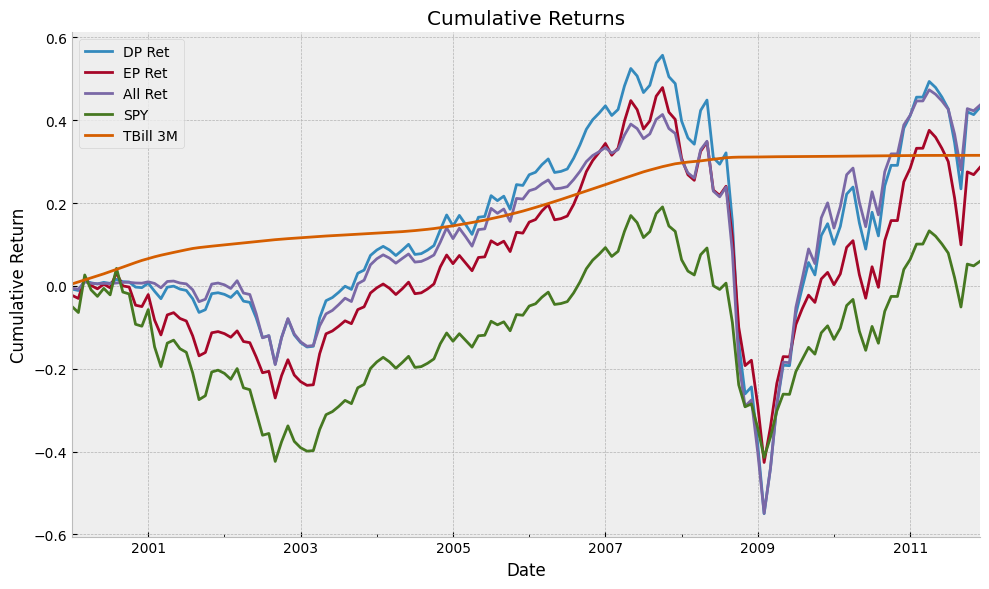

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

((1 + subset[["DP Ret", "EP Ret", "All Ret", "SPY", "TBill 3M"]]).cumprod() - 1).plot(
    ax=ax
)
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return")
ax.set_title("Cumulative Returns")
fig.tight_layout()

We see that the risk free rate is second. Note, though, that both SPY and our dynamic portfolio have huge drawdowns during the financial crisis (and dot-com bubble). Thus, the statement that stocks underperform the risk-free rate during a sample with *two* recessions is perhaps a little uncharitable.

### 4



In [ ]:
# How many negative returns forecast.
negative = (forecast[["DP Pred", "EP Pred", "All Pred"]] < 0).sum() / len(forecast)
display(negative)

DP Pred     0.000000
EP Pred     0.000000
All Pred    0.002924
dtype: float64

- "if we forecast negative returns, short SPY. if we forecast positive returns, long SPY"
- We only predict negative returns a very small (0.3%) percent of the time for the all predictions. Notable, we never predict it to be negative for EP or DP.

### 5

For $r^X$; yes. Given that for all of the models we tested, they have very high market betas. So they are just loading up on market risk. They have high $r^2$ to the market as well. They have higher vol and return, but a higher sharpe.

Looking at GMWAX, I don't think it is necessarily risk that makes it worse, but rather it is just worse than SPY across the board, though it has a better max drawdown. Finally, it has a somewhat high market beta.

- "all 3 strategies are just loading up on market risk, so the results or returns are not that different from the overall market"